### 1.-

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def circle_points(center=[0,0], ratio = [0,1], limx = [-1,1], limy = [-1,1],nmax=1000):
    dat = []
    for i in range(nmax):
        x = (limx[1] - limx[0])* np.random.rand() + limx[0]
        y = (limy[1] - limy[0])* np.random.rand() + limy[0]
        
        if ratio[0] <= (x - center[0])**2 + (y - center[1])**2 <= ratio[1]:
            dat.append([x,y])
    
    return np.asarray(dat)

### Gradient descent - Stochastic gradient descent

$w_{t + 1} = w_{i} - \eta \partial_{w}\ell = w_{i} - \eta X(W^{T}X - Y)$

In [7]:
def linear_model(x,w):
    return np.dot(x,w)

In [8]:
def gd( x, y, steps = 15,learning_rate = 0.1):
    eta = learning_rate
    w = np.zeros( [ steps, x.shape[1] ] )
    w[0] = np.random.rand( x.shape[1])
    for i in range(steps - 1):
        g = np.dot(linear_model(x, w[i]) - y, x)
        w[i+1] = w[i] - eta*g
    return w

def sgd( x, y, steps = 15, batch_size = 5, learning_rate = 0.1):
    eta = learning_rate
    w = np.zeros( [ steps, x.shape[1] ] )
    w[0] = np.random.rand( x.shape[1])
    for i in range(steps - 1):
        m = np.random.randint( 0, x.shape[0], batch_size)
        g = np.dot(linear_model(x[m,:], w[i]) - y[m], x[m,:])
        w[i+1] = w[i] - eta*g
    return w            

### GD vs SGD 20 points

In [9]:
xtrain1 = (2 + 1) * np.random.rand(20) - 1
e1 = np.random.normal(0,1,20)

In [10]:
ytrain1 = -2*xtrain1 + 1 + e1

In [11]:
xmod = np.linspace(-1,2,20)
ymod = -2*xmod + 1

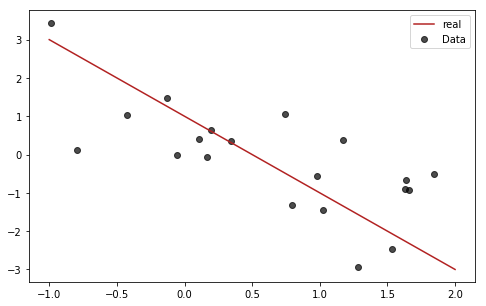

In [12]:
plt.figure(figsize = (8,5) )
plt.scatter(xtrain1, ytrain1, alpha=0.7, color='black',label='Data')
plt.plot(xmod,ymod,color='firebrick',label='real')
plt.legend(loc='best')
plt.show()

In [13]:
Xtrain1 = np.hstack( (np.ones([len(xtrain1),1]),xtrain1[:,None]) )

In [14]:
Xtrain1.shape

(20, 2)

In [15]:
w1 = gd( Xtrain1, ytrain1, steps = 30, learning_rate = 0.01)

In [16]:
w2 = sgd( Xtrain1, ytrain1, steps = 30, batch_size = 19, learning_rate = 0.01)

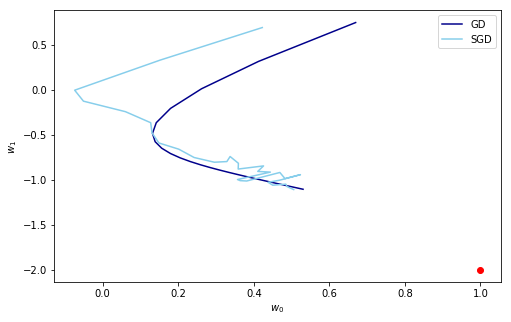

In [17]:
plt.figure(figsize = (8,5) )
plt.plot( w1[:,0], w1[:,1], color = 'darkblue',label ='GD')
plt.plot( w2[:,0], w2[:,1], color = 'skyblue' ,label = 'SGD')

plt.plot( 1,-2,'o',color='red')
plt.xlabel('$w_{0}$')
plt.ylabel('$w_{1}$')
plt.legend(loc = 'best')
plt.show()

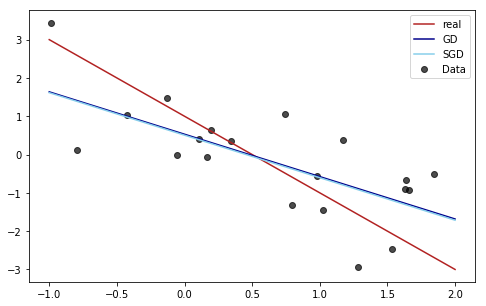

In [18]:
plt.figure(figsize = (8,5) )
plt.scatter(xtrain1, ytrain1, alpha=0.7, color='black',label='Data')
plt.plot(xmod,ymod,color='firebrick',label='real')

plt.plot(xmod,w1[-1,0] + w1[-1,1]*xmod,color='darkblue',label='GD')
plt.plot(xmod,w2[-1,0] + w2[-1,1]*xmod,color='skyblue',label='SGD')

plt.legend(loc='best')
plt.show()

### GD vs SGD 2000 points

In [19]:
xtrain2 = (2 + 1) * np.random.rand(2000) - 1
e2 = np.random.normal(0,1,2000)
ytrain2 = -2*xtrain2 + 1 + e2

In [20]:
Xtrain2 = np.hstack( (np.ones([len(xtrain2),1]),xtrain2[:,None]) )

In [21]:
Xtrain2.shape

(2000, 2)

In [22]:
w3 = gd( Xtrain2, ytrain2, steps = 30, learning_rate = 0.01)
w4 = sgd(Xtrain2, ytrain2, steps = 30, batch_size = 50, learning_rate = 0.01)

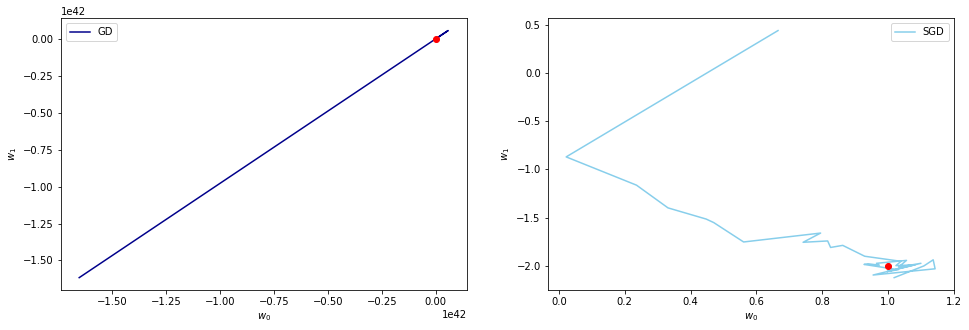

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))

#plt.figure(figsize = (8,5) )
ax1.plot( w3[:,0], w3[:,1], color = 'darkblue',label ='GD')
ax1.plot( 1,-2,'o',color='red')


ax2.plot( w4[:,0], w4[:,1], color = 'skyblue' ,label = 'SGD')
ax2.plot( 1,-2,'o',color='red')

ax1.set_xlabel('$w_{0}$')
ax1.set_ylabel('$w_{1}$')
ax2.set_xlabel('$w_{0}$')
ax2.set_ylabel('$w_{1}$')

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')

plt.show()

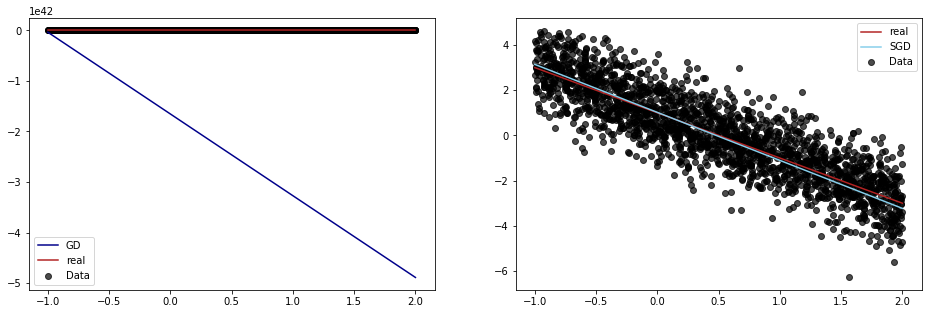

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))


ax1.scatter(xtrain2, ytrain2, alpha=0.7, color='black',label='Data')
ax1.plot(xmod,w3[-1,0] + w3[-1,1]*xmod,color='darkblue',label='GD')
ax1.plot(xmod,ymod,color='firebrick',label='real')
ax1.legend(loc='best')



ax2.scatter(xtrain2, ytrain2, alpha=0.7, color='black',label='Data')
ax2.plot(xmod,ymod,color='firebrick',label='real')
ax2.plot(xmod,w4[-1,0] + w4[-1,1]*xmod,color='skyblue',label='SGD')
ax2.legend(loc='best')


plt.show()

### SVM - SGD

$ x_{i} \in \mathbb{R}^{d}$, $y_{i}\in \left\{ \pm 1\right\} \Rightarrow y_{i} = \text{sign}\left(\langle w,x_{i}\rangle\right)$ $\forall i$ 

Implementing SVM using SGD: $min_{w}\left( \frac{\lambda}{2}||w||^{2} + \frac{1}{N}\sum_{i}^{N} max\left\{0, 1 - y\langle w,x_{i}\rangle \right\} \right)$
Solution : $w_{t+1} = -\frac{1}{\lambda t}\sum_{j = 1}^{t} v_{t}$
    

In [27]:
def svm( X, Y, l = 1, steps = 50):
    theta = np.zeros( [ steps, X.shape[1]])
    w = np.zeros( [ steps - 1, X.shape[1]])
    
    for i in range( steps - 1):
        w[i] = (1/((i + 1)*l))*theta[i]
        j = np.random.randint( X.shape[0])
        if Y[j]*np.dot( w[i], X[j]) < 1:
            theta[i+1] = theta[i] + Y[j]*X[j]
        else:
            theta[i+1] = theta[i]
    
    return w[-1]
                    

In [28]:
xtest = np.array([ [0,1.5], [1,3], [2,3.5] , [-1,3] , [1.5,0] , [-0.5,-1], [0,0], [1,1] ])

In [29]:
ytest = np.array( [ 1, 1, 1, 1, -1, -1, -1, -1])

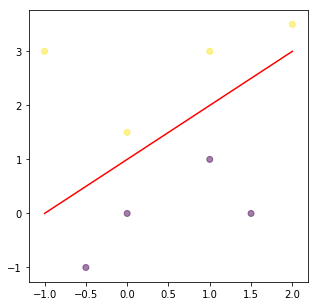

In [30]:
plt.figure(figsize = (5,5))
plt.plot(xmod, 1+xmod, color = 'red')
plt.scatter( xtest[:,0], xtest[:,1], marker = 'o', c = ytest, alpha = 0.5)
#plt.legend(loc = 'best')
plt.show()

In [31]:
Xtest = np.hstack( (np.ones([xtest.shape[0],1]), xtest) )

In [32]:
Xtest , ytest, 1/100

(array([[ 1. ,  0. ,  1.5],
        [ 1. ,  1. ,  3. ],
        [ 1. ,  2. ,  3.5],
        [ 1. , -1. ,  3. ],
        [ 1. ,  1.5,  0. ],
        [ 1. , -0.5, -1. ],
        [ 1. ,  0. ,  0. ],
        [ 1. ,  1. ,  1. ]]), array([ 1,  1,  1,  1, -1, -1, -1, -1]), 0.01)

In [33]:
w1 = svm( X = Xtest, Y = ytest, l = 0.01)

In [34]:
w1mean = np.mean(w1,axis =0 )

In [35]:
norma1 = np.linalg.norm(w1[-1])

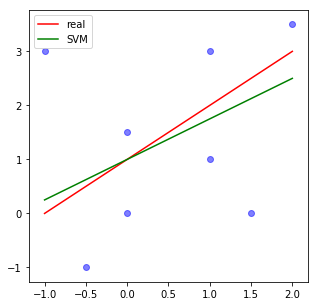

In [69]:
plt.figure(figsize = (5,5))

plt.plot(xmod, 1+xmod, color = 'red', label = 'real')
plt.plot(xmod, (-1/w1[2])*(w1[0]+w1[1]*xmod), color = 'green',label = 'SVM')

plt.scatter(xtest[:,0],xtest[:,1],marker = 'o',color = 'blue',alpha = 0.5)
plt.legend(loc = 'best')
plt.show()

### Classification - SVM

In [38]:
C1 = circle_points()
C2 = circle_points( center = [2,2], limx = [0,4], limy = [0,4])

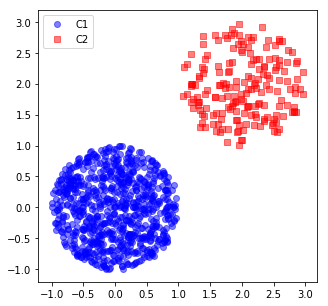

In [39]:
plt.figure(figsize = (5,5))
plt.scatter(C1[:,0],C1[:,1],marker = 'o',color = 'blue',alpha = 0.5,label = 'C1')
plt.scatter(C2[:,0],C2[:,1],marker = 's',color = 'red',alpha = 0.5,label = 'C2')
plt.legend(loc = 'best')
plt.show()

In [40]:
C1.shape, C2.shape

((791, 2), (190, 2))

In [41]:
#t3 = np.vstack( (np.ones([C1.shape[0],1]), -1*np.ones([C2.shape[0],1])) ) 
ytrain3 = np.hstack( (np.ones([C1.shape[0]]), -1*np.ones([C2.shape[0]])) ) 

In [42]:
ytrain3.shape

(981,)

In [43]:
Xtrain3 = np.hstack( (np.ones([C1.shape[0] + C2.shape[0],1]), np.vstack( (C1, C2) ) ) )

In [44]:
Xtrain3.shape

(981, 3)

In [45]:
Xtrain3

array([[ 1.        ,  0.07866032,  0.85819036],
       [ 1.        ,  0.27369849, -0.24052232],
       [ 1.        , -0.16980177,  0.76216219],
       ...,
       [ 1.        ,  2.19223866,  1.34016971],
       [ 1.        ,  2.09237579,  1.91497706],
       [ 1.        ,  2.63285478,  2.69920763]])

In [46]:
w2 = svm( X = Xtrain3, Y = ytrain3, l = 0.01)

In [47]:
norm2 = np.linalg.norm(w2 )

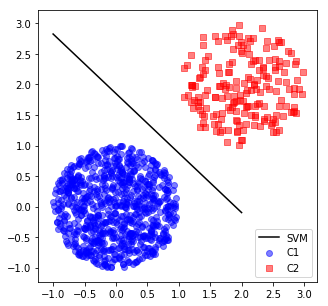

In [48]:
plt.figure(figsize = (5,5))

plt.plot(xmod, (-1/w2[2])*(w2[0]+w2[1]*xmod), color = 'black', label = 'SVM')


plt.scatter(C1[:,0],C1[:,1],marker = 'o',color = 'blue',alpha = 0.5,label = 'C1')
plt.scatter(C2[:,0],C2[:,1],marker = 's',color = 'red',alpha = 0.5,label = 'C2')
plt.legend(loc = 'best')
plt.show()


### Test 4

In [49]:
xline = np.linspace(-2,2,100)

xtest4 = (2+2)*np.random.rand(100)- 2
ytest4 = (6.5+3.4)*np.random.rand(100)-3.5 

In [50]:
yline = 0 * xline - 0
ypoints = 1 + -1*xline + 1*xline**2

In [51]:
ylscat = 0 * xtest4 - 0
ypolscat = 1 + -1*xtest4 + 1*xtest4**2

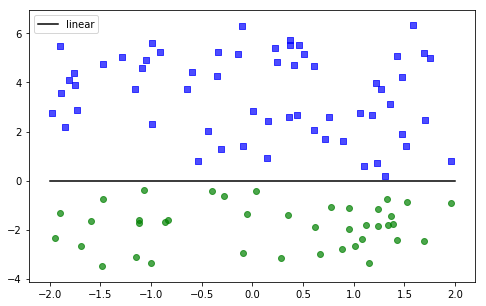

In [52]:
plt.figure( figsize=(8,5))
for a, b, c in zip( xtest4, ytest4, ylscat):
    if b < c:
        plt.scatter( a, b, marker = 'o', alpha = 0.7, color = 'green')
    if b >= c:
        plt.scatter( a, b,marker = 's', alpha = 0.7, color = 'blue')
plt.plot( xline, yline, color = 'black', label = 'linear')
plt.legend(loc = 'best')
plt.show()

In [53]:
xtest4.shape

(100,)

In [54]:
target = np.where(ytest4 < ylscat, -1, 1)

In [55]:
Xtrain4 = np.hstack( (np.ones([xtest4.shape[0],1]), xtest4[:,None], ytest4[:,None] ) )

In [56]:
#xtest4

In [57]:
#Xtrain4

In [58]:
w4 = svm(X = Xtrain4, Y = target, l = 0.1)

In [59]:
w4mean = np.mean(w4,axis =0 )

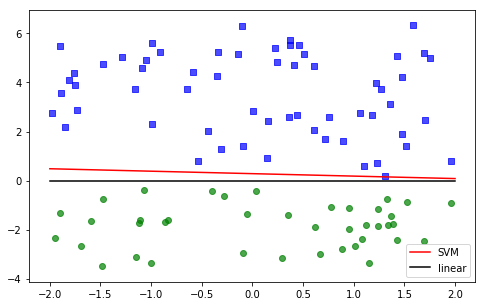

In [60]:
plt.figure(figsize = (8,5))
#plt.plot(xline, (-1/theta4[-1,2])*(theta4[-1,0]+theta4[-1,1]*xline), color = 'red')
plt.plot(xline, (-1/w4[2])*(w4[0]+w4[1]*xline), color = 'red',label = 'SVM')
#plt.plot(xline, (-1/w4mean[2])*(w4mean[0]+w4mean[1]*xline), color = 'green')


for a, b, c in zip( xtest4, ytest4, ylscat):
    if b < c:
        plt.scatter( a, b, marker = 'o', alpha = 0.7, color = 'green')
    if b >= c:
        plt.scatter( a, b,marker = 's', alpha = 0.7, color = 'blue')

plt.plot( xline, yline, color = 'black', label = 'linear')

plt.legend(loc = 'best')
plt.show()

### Kernel trick

Implementing SVM using SGD: $min_{w}\left( \frac{\lambda}{2}||w||^{2} + \frac{1}{N}\sum_{i}^{N} max\left\{0, 1 - y\langle w,\phi(x_{i})\rangle \right\} \right)$

Linear kernel: $K(x,x') = \langle x, x'\rangle = x^{T}x'$

In [72]:
def linear_svm( X, Y, l, steps = 15):
    
    beta  = np.zeros( X.shape[0] )
    I = np.arange(X.shape[0])
    
    for t in range( steps ):
        alpha = (1/((t + 1)*l))*beta
        j = np.random.randint( X.shape[0])
        Inoj = np.delete( I, j)
        #beta[j] = beta[j] 
        
        for i in Inoj:
            if (Y[i]*np.dot( alpha, np.dot(X, X[i])) )< 1:
                beta[i] = beta[i] + Y[i]
            else:
                beta[i] = beta[i]
     
    return np.dot( alpha, X)
        
    #print(beta, alpha)
        
        
    
    

In [80]:
w5 = linear_svm(X = Xtest, Y = ytest, l = 0.1, steps = 50)

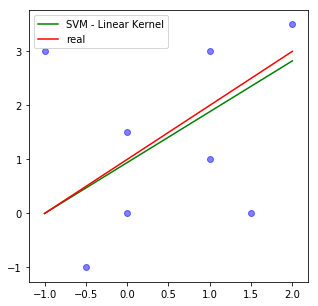

In [81]:
plt.figure(figsize = (5,5))
plt.plot(xmod, (-1/w5[2])*(w5[0]+w5[1]*xmod), color = 'green',label = 'SVM - Linear Kernel')
plt.plot(xmod, 1+xmod, color = 'red', label = 'real')
plt.scatter(xtest[:,0],xtest[:,1],marker = 'o',color = 'blue',alpha = 0.5)
plt.legend(loc = 'best')
plt.show()

In [82]:
w6 = linear_svm(X = Xtrain4, Y = target, l = 1, steps = 50)

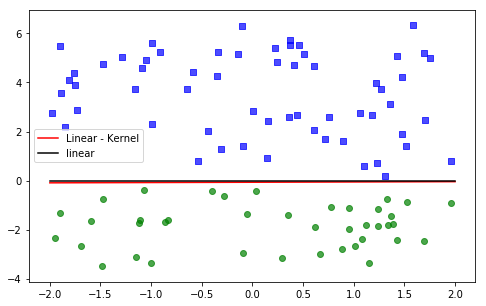

In [85]:
plt.figure(figsize = (8,5))
plt.plot(xline, (-1/w6[2])*(w6[0]+w6[1]*xline), color = 'red',label = 'Linear - Kernel')


for a, b, c in zip( xtest4, ytest4, ylscat):
    if b < c:
        plt.scatter( a, b, marker = 'o', alpha = 0.7, color = 'green')
    if b >= c:
        plt.scatter( a, b,marker = 's', alpha = 0.7, color = 'blue')

plt.plot( xline, yline, color = 'black', label = 'linear')

plt.legend(loc = 'best')
plt.show()

### Non-linear kernels

Polynomial: $K(x,x') = \langle \phi(x), \phi(x') \rangle = \left(1 + \langle x, x' \rangle\right)^{k}$


Gaussian: $K(x,x') =  \langle \phi(x), \phi(x') \rangle = \text{exp}-\frac{1}{2} || x - x'||^{2}$

In [ ]:
class kernel_svm( object):
    """ 
    
    """
    
    def __init__( X, Y, l, kernel = 'linear', degree = 1, steps = 50):
        self.l = l
        self.kernel = kernel
        if self.kernel == 'linear':
            self.kernel = 'poly'
            self.degree = 1
        self.d = degree  
        
    
    def build_kernel( self, X):
        self.K = np.dot( X, X.T)
        
        if self.kernel == 'polynomial':
            self.K = ( 1 + self.k )**self.d
            
        elif self.kernel=='gaussian':
            self.xsquared = (np.diag(self.K)*np.ones((1,self.N))).T
            b = np.ones((self.N,1))
            self.K -= 0.5*(np.dot(self.xsquared,b.T) + np.dot(b,self.xsquared.T))
            self.K = np.exp(self.K/(2.*self.sigma**2))            
        
        
            
    

In [76]:
a = np.array([ 0, 2, 4, 8, 16])

In [88]:
np.diag((2,2))

array([[2, 0],
       [0, 2]])